# M8 - TP 3 : Statistiques bivariées

## Objectif

Le but de ce TP est de mettre en oeuvre des statistiques opérant sur deux variables de qualités différentes (nature/continue, et quantitative/qualitative).

Pour cela, nous utiliserons les tableaux de contingence et la distance du $\chi_2$ ainsi que les coefficients de corrélation.

### Compétences associées :

| Numéro        | Compétence           | 
|:------------- |:--------------------:|
|AS201|	Connaître la définition d’un tableau de contingence|
|AS202|	Être capable de calculer les éléments d'un tableau de contingence|
|AS203| Savoir mesurer la dépendance linéaire de deux variable en calculant le coefficient de corrélation|
|AS204|	Connaître les propriétés du coefficient de corrélation|
|AS205|	Savoir analyser un coefficient de corrélation|
|AS206|	Connaître la définition de la distance du $\chi_2$|
|PY103|	Être capable d’afficher un ensemble de nuage de points entre deux variables|
|PY201|	Être capable de calculer un tableau de contingence de deux suites de données|
|PY202|	Être capable de calculer le coefficient de corrélation entre deux variables quantitatives|
|PY203|	Être capable de calculer la distance du $\chi_2$ de deux variables qualitatives|


In [5]:
import numpy as np
import matplotlib.pyplot as plt


## Sudoku

Nous avons le tableau de contingence incomplet suivant :

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 2 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 &   &    &    \\
 \hline
 x_2 &    &   &    &    \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&    &    &1   \\
 \hline
\end{array}

De plus, nous disposons de l’information suivante :
\begin{equation}
     \mathbb{P}(Y = y_1 |X = x_2) = \frac{1}{2}
\end{equation}

\begin{equation}
     \mathbb{P}(Y = y_3 |X = x_1) = \frac{1}{2}
\end{equation}

\begin{equation}
     \mathbb{E}(Y|X = x_2) = \frac{3}{2}
\end{equation}

1\. Compléter le tableau de contingence
**Astuce**: Pour le calculer le plus rapidement, suivez l'ordre suivant :

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 2 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 & \textbf{0.2}  & \textbf{0.3}   &  \textbf{0.6}  \\
 \hline
 x_2 &  \textbf{0.2}  &  \textbf{0.2} &  \textbf{0}  &  \textbf{0.4}  \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&  \textbf{0.4}  &  \textbf{0.3}  &1   \\
 \hline
\end{array}


De plus, les variables **6 et 7** s'obtiennent en résolvant un système de deux équations à deux inconnues

### Les variables $X$ et $Y$ sont elles indépendantes 
1. Calculez le tableau théorique sous l'hypothèse d'indépendance

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 2 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.18 & \textbf{0.24}  & \textbf{0.18}   &  \textbf{0.6}  \\
 \hline
 x_2 &  \textbf{0.12}  &  \textbf{0.16} &  \textbf{0.12}  &  \textbf{0.4}  \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&  \textbf{0.4}  &  \textbf{0.3}  &1   \\
 \hline
\end{array}

2. Calculez la distance du $\chi_2$ à partir du tableau de contingence et du tableau théorique

In [12]:
theo = np.array([[0.18,0.24,0.18],[0.12,0.16,0.12]])
contin =np.array([[0.1,0.2,0.3],[0.2,0.2,0]])
x=0
for i in range(len(theo)):
    for j in range(len(theo[0])):
        x+=(contin[i][j]-theo[i][j])**2/theo[i][j]
x

0.3055555555555556

3. Vérifiez que vous obteniez bien la même chose avec scipy. 

NB : jetez un oeil à la doc de `chi2_contingency` du module scipy.stats

In [13]:
import scipy.stats as spicy
spicy.chi2_contingency(contin)

(0.30555555555555547,
 0.8583204384950875,
 2,
 array([[0.18, 0.24, 0.18],
        [0.12, 0.16, 0.12]]))

# Réchauffement climatique


1. Le code ci dessous permet de charger les émissions de CO2 ainsi que la température globale de la Terre. Les données sont issues de https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#co2-and-greenhouse-gas-emissions-country-profiles.
Essayez de les récupérer et de les traiter par vous mêmes. Sinon reprenez le code ci dessous.

Quelle est la nature des variables ?

In [19]:
import csv
import numpy as np

#https://ourworldindata.org/co2-and-other-greenhonuse-gas-emissions#co2-and-greenhouse-gas-emissions-country-profiles

tmp = []
min_year = 1900

with open('co-emissions-per-capita.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Entity'] == 'World':
            if int(int(row['Year']
                      ) >= min_year):
                tmp.append([float(row['Per capita CO2 emissions'])])
data_co2 = np.array(tmp)

tmp = []
with open('temperature-anomaly.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Entity'] == 'Global':
            if int(int(row['Year']) >= min_year):
                tmp.append([float(row['Median temperature anomaly from 1961-1990 average'])])
data_temp = np.array(tmp)

np.savez('data_global_warming.npz', co2=data_co2, temp=data_temp)
# 2 continues

2. Faites un résumé graphique du couple de variable sous forme d'un nuage de points

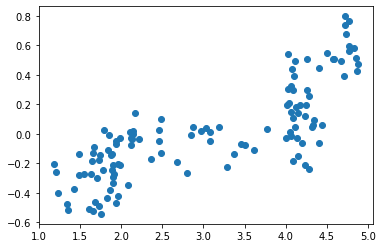

In [23]:
plt.scatter(data_co2,data_temp)

3. Utilisez un bon indicateur quantitatif pour vous donner une idée si les deux variables sont dépendantes.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb584700c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5847011e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb584700970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb584701780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb584701a50>],
 'means': []}

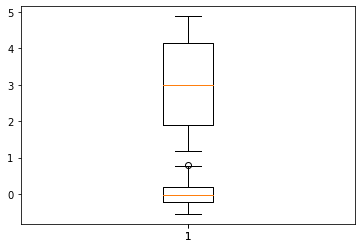

In [26]:
plt.boxplot(data_co2)
plt.boxplot(data_temp)

## Matrices de contingence sur données réelles

1\. Récupérer le fichier DataExo1.mat sur Moodle.

Les détails sur ces données sont disponibles https://archive.ics.uci.edu/ml/datasets/Student+Performance. Ces données décrivent les résultats des élèves dans l’enseignement secondaire de deux écoles portugaises.

In [27]:
import scipy.io as sio 
mat = sio.loadmat("DataExo1.mat")

2\. On commence par s’intéresser aux deux premières variables qui codent pour l’école $x$ et le genre $g$ de la personne interviewée.

In [28]:
x = mat["DataExo1"][:, 0]
g = mat["DataExo1"][:, 1]
n=len(x)

3\. Construisez le tableau de contingence $O$ entre les variables $x$ et $g$

4\. Construisez le tableau théorique associé en supposant l’indépendance des deux variables.

5\. Calculez la distance du $\chi_2$ entre les variables $x$ et $g$. Ces deux variables sont elles liées ou sont elles indépendantes ?

6\.Vérifiez que la fonction chi2_contingency de scipy.stats fait bien la même chose

7\. On s’intéresse maintenant à la septième variable $Me$ qui code le niveau d’éducation des mère de la manière suivante :

    * 0 - none,
    * 1 - primary education (4th grade),
    * 2 - 5th to 9th grade,
    * 3 - secondary education
    * 4 - higher education

Récupérez cette variable et calculez les effectifs de chacune des modalités. Qu’en concluez vous ?

8\. Construisez le tableau de contingence N entre les variables $x$ et $Me$

9\. Construisez le tableau théorique associé en supposant l’indépendance des deux variables.

10\. Calculez la distance du $\chi_2$ entre les variables $x$ et $Me$. Ces deux variables $x$ et $Me$ sont elles liées ou sont elles indépendantes ? Que peut on en déduire sur le choix de l’école ?